In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
# I store columns in a variables to apply them on my columns, because before i have only numbers instead of names

df = pd.read_csv('magic04.data', names = cols)
df.sample(7)

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
14279  141.9091  34.0649  3.2953  0.2417  0.1856 -200.6945  -23.6763   
17425  123.8890  17.1761  2.6998  0.3752  0.1886  101.3740  104.6460   
10271   38.1116  18.2224  2.8968  0.2689  0.1503   14.8540    7.4557   
12558   52.8873  21.6376  3.0466  0.3457  0.1903   35.5261   46.9113   
5431    25.6849  15.0191  2.5321  0.3877  0.2159    6.8213   16.0753   
3549    26.2400  11.9813  2.4764  0.5743  0.3723    9.7825   16.9651   
710     81.3975  49.1218  3.4263  0.1206  0.0643 -109.9800  -59.5665   

       fM3Trans   fAlpha     fDist class  
14279   20.0167  36.9793  325.0043     h  
17425    3.8947   9.9324  352.5240     h  
10271    7.0755   2.0107  224.9250     g  
12558   -6.1959  88.7428  167.6670     h  
5431   -11.6748  38.8830  143.9950     g  
3549    12.9885   9.2560  113.4090     g  
710     49.1951  22.7735  221.9710     g

In [4]:
df['class'] = df['class'].map({'g' : 1, 'h' : 0})

In [5]:
df.sample(7)

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
7998    34.5344  20.8554  2.6021  0.4000  0.2362   28.2809   34.1069   
17262  123.2858  29.4780  3.2032  0.1452  0.0930   27.1059   19.8570   
11212   65.8896  19.1164  3.1230  0.2546  0.1307  -43.8047   54.8014   
6323    50.0677  17.6383  2.8052  0.2443  0.1245  -69.2489  -33.4756   
13989  290.9274  63.2814  3.8407  0.1196  0.0427 -293.1875 -248.5843   
10467   22.3748  12.5193  2.4224  0.4991  0.2665   29.6608   -9.3890   
14361   20.8247   7.1719  2.0233  0.7014  0.3554   -1.3973    8.6766   

       fM3Trans   fAlpha     fDist  class  
7998   -16.6342   9.6722  262.1440      1  
17262  -36.8857  32.2261   94.2075      0  
11212   13.4706   0.2752  296.4280      1  
6323   -12.1053  21.8870  233.1490      1  
13989   42.2985  43.2185  220.5279      0  
10467   -8.6924  21.5184  185.9220      1  
14361    6.0362  39.4350  100.7610      0

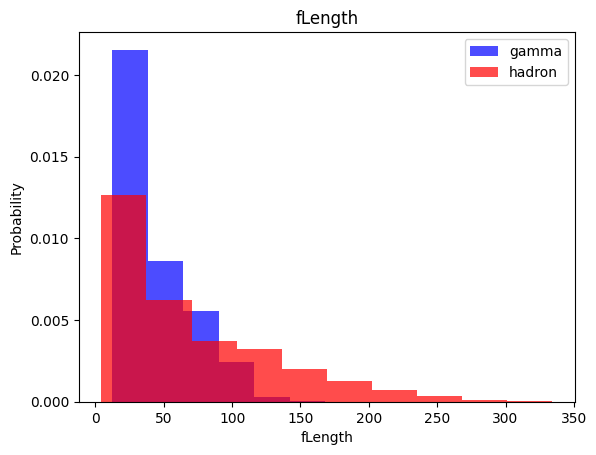

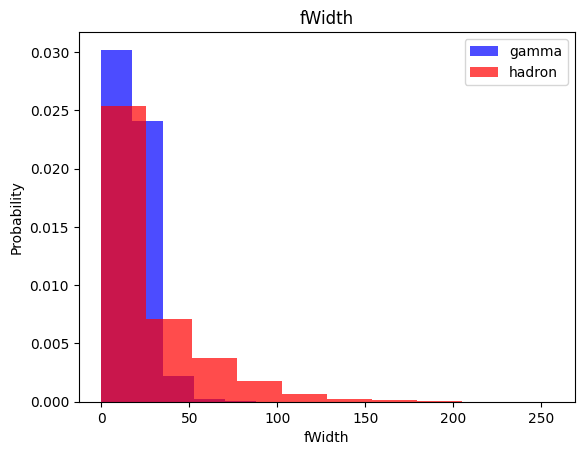

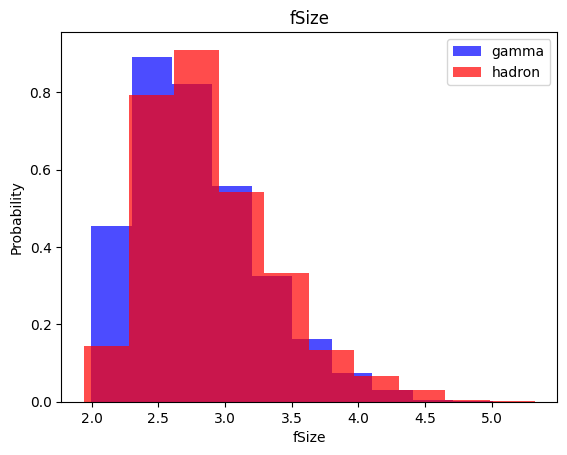

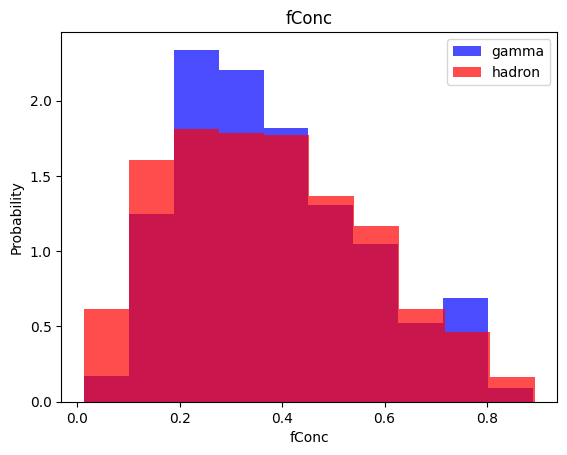

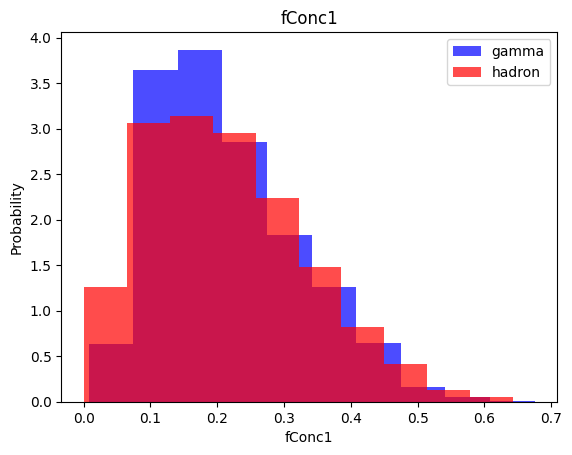

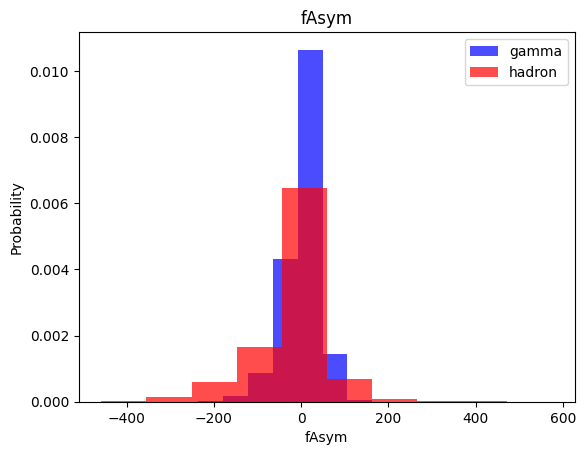

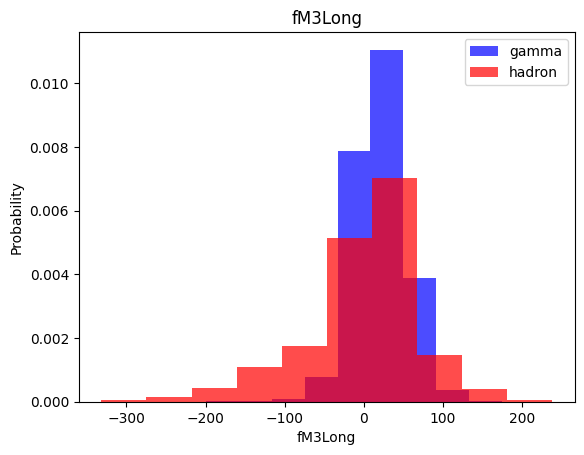

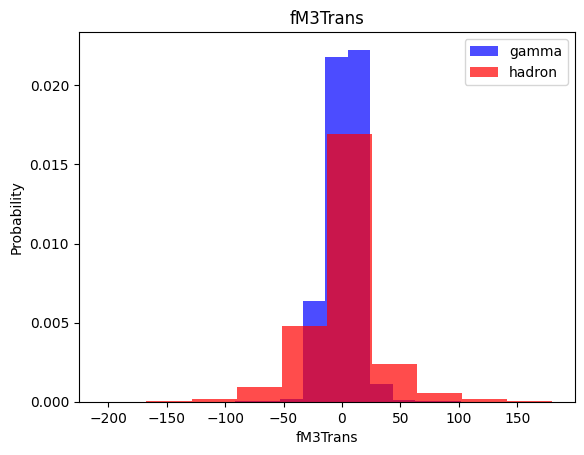

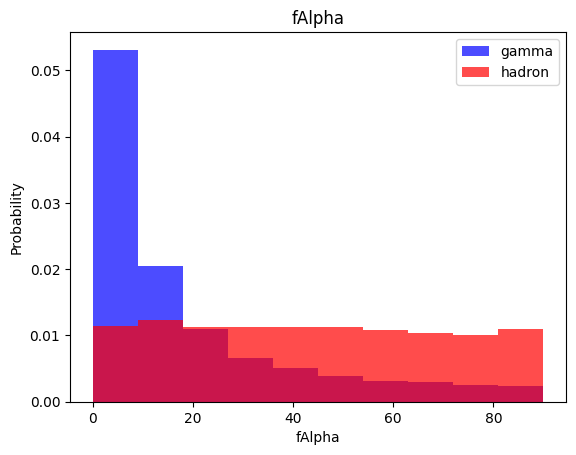

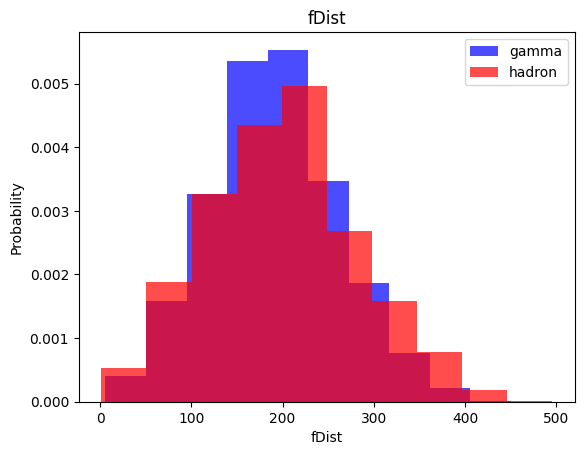

In [6]:
# I gonna plot my data to see how it is distributed
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = 'blue', label='gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int(0.8 * len(df))])
# Now I prepare sets, first shuffling my data, then making split as 60% of data and next split as 80% of data

In [8]:
df["class"].value_counts()
# I see that my classes are imbalanced, so i gonna use over sampling method and also scale my columns

1    12332
0     6688
Name: class, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [10]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[: - 1]].values
  y = dataframe[dataframe.columns[- 1]].values

  sc = StandardScaler()
  X = sc.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # here i stack my columns and change y which is 1D vector into 2D object

  return data, X, y

In [11]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)
# I set oversampling in val and test data at false, because i gonna measure performance of my model with it

In [12]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm' : {
        'model' : svm.SVC(gamma = 'auto'),
        'params' : {
            'C' : [1, 10, 20],
            'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params' : {
            'C' : [1, 5, 10],
        }
    },
    'knn_model' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [1, 5, 10],
            'weights' : ['uniform', 'distance'],
            'leaf_size' : [30, 40, 50],
            'p' : [1, 2]

        }
    },
    'NB_model' : {
        'model' : GaussianNB(),
        'params' : {
            'var_smoothing' : [0.00000001, 0.000000001, 0.00000001]
        }
    }
}

In [64]:
df = pd.DataFrame(df)

In [14]:
scores = []

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
  clf.fit(X_train, y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

model  best_score  \
0                  svm    0.858056   
1  logistic_regression    0.769769   
2            knn_model    0.917231   
3             NB_model    0.649407   

                                         best_params  
0                         {'C': 20, 'kernel': 'rbf'}  
1                                           {'C': 5}  
2  {'leaf_size': 30, 'n_neighbors': 10, 'p': 1, '...  
3                           {'var_smoothing': 1e-08}

In [15]:
import tensorflow as tf

In [16]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label = 'accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [17]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])
  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr),
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

  history = nn_model.fit(X_train, y_train,
                       epochs = epochs,
                       batch_size = batch_size,
                       validation_split = 0.2,
                       verbose = 0)

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


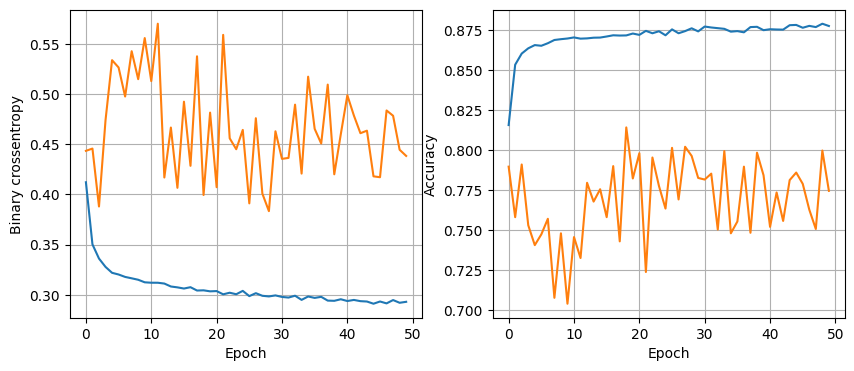

119/119 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.01, batch size 64


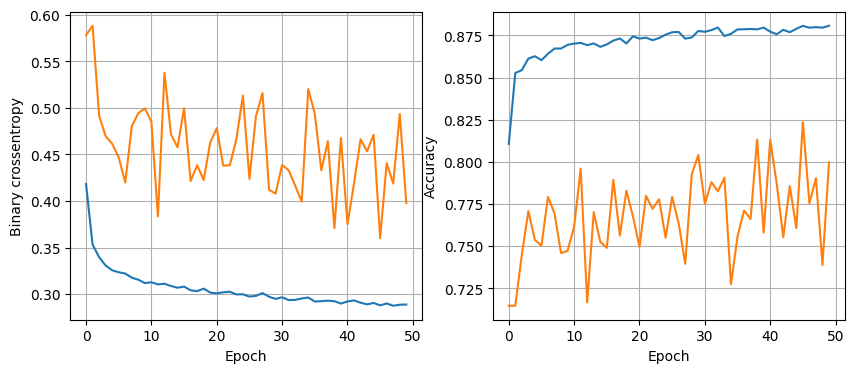

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8654
16 nodes, dropout 0, lr 0.01, batch size 128


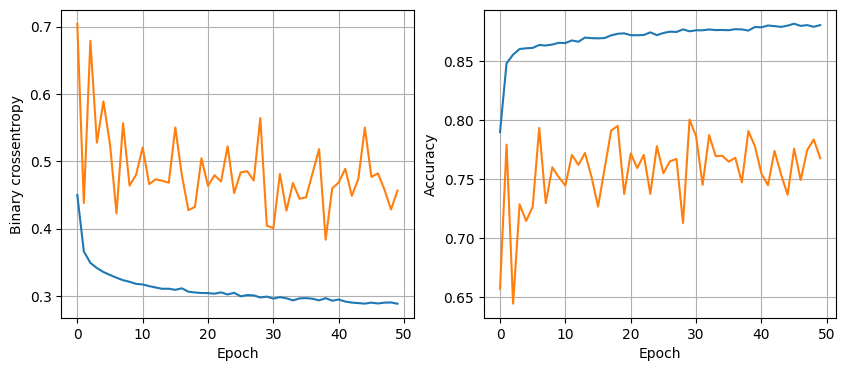

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.005, batch size 32


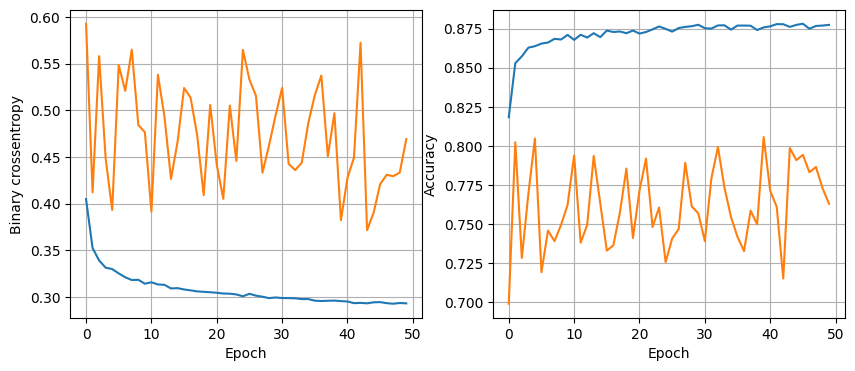

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8649
16 nodes, dropout 0, lr 0.005, batch size 64


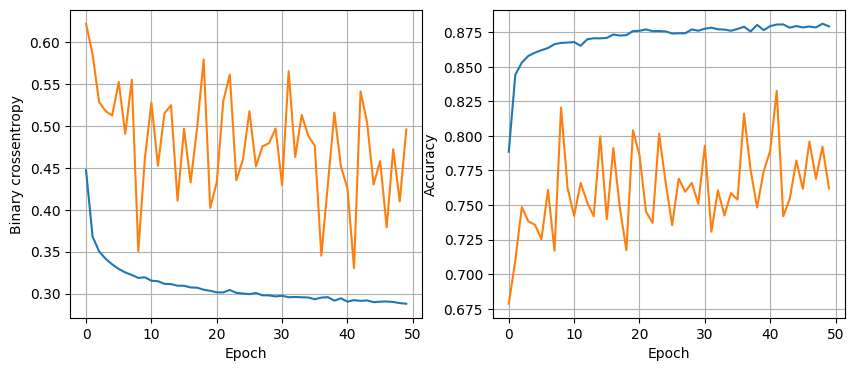

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.005, batch size 128


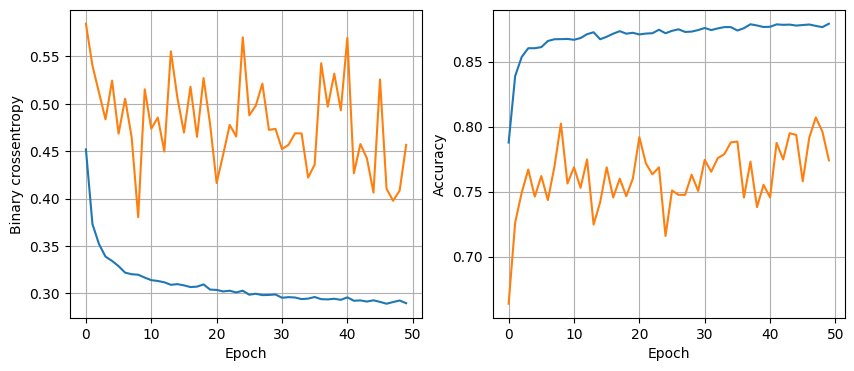

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.001, batch size 32


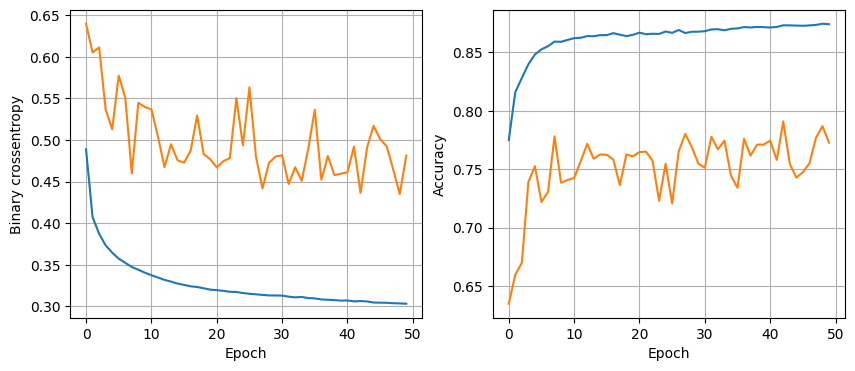

119/119 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.001, batch size 64


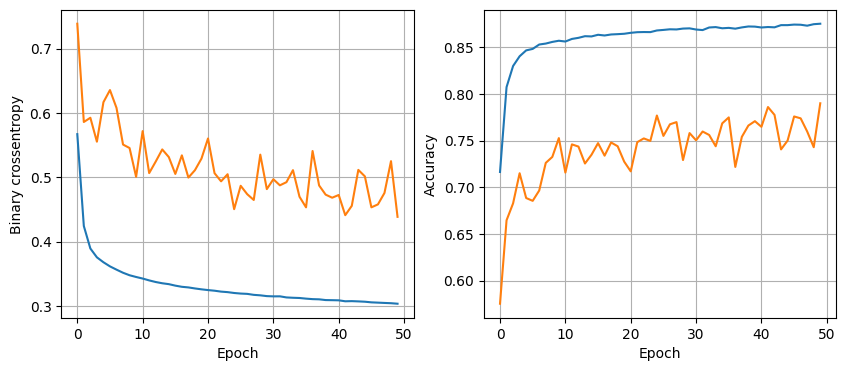

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.001, batch size 128


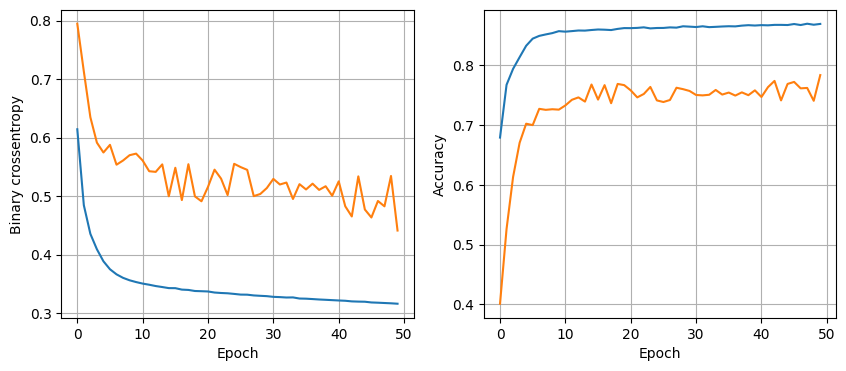

119/119 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.01, batch size 32


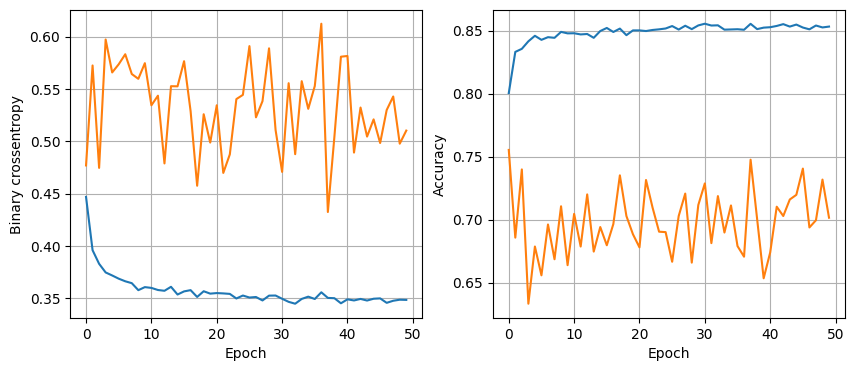

119/119 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8609
16 nodes, dropout 0.2, lr 0.01, batch size 64


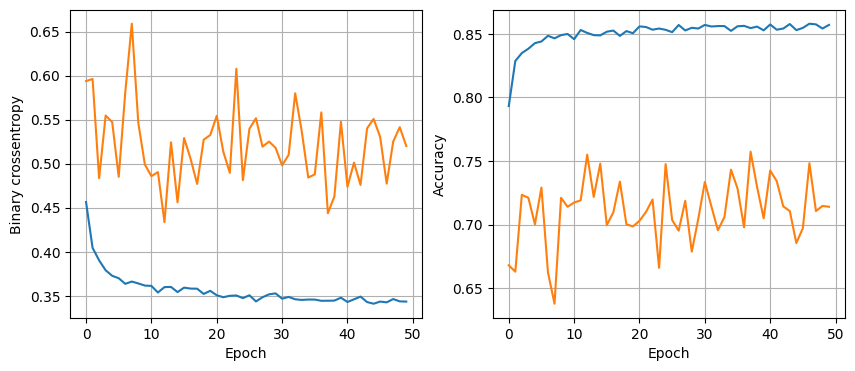

119/119 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.01, batch size 128


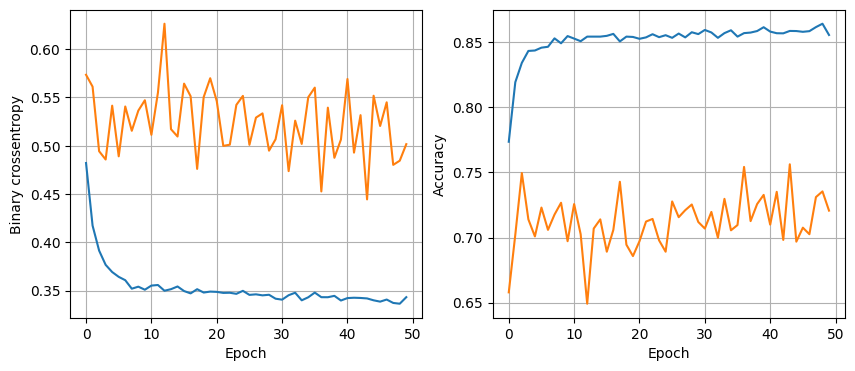

119/119 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8688
16 nodes, dropout 0.2, lr 0.005, batch size 32


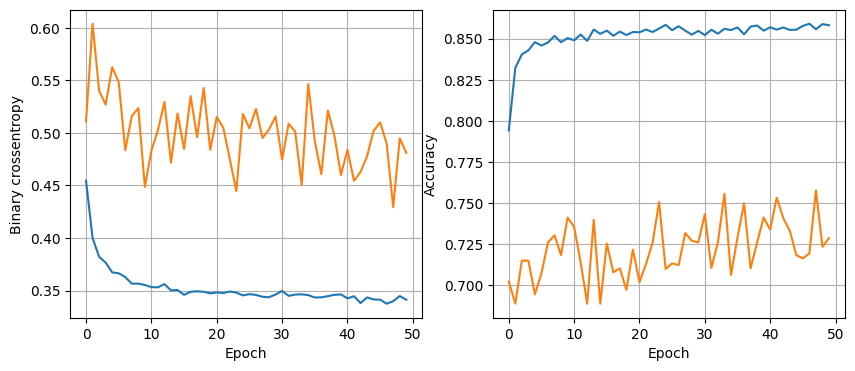

119/119 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.005, batch size 64


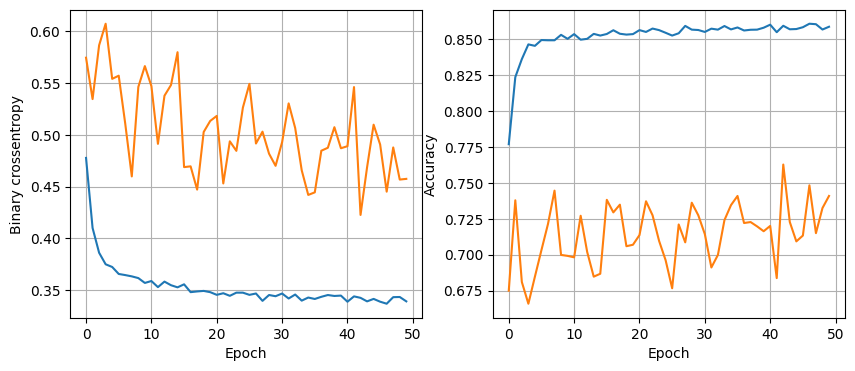

119/119 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.005, batch size 128


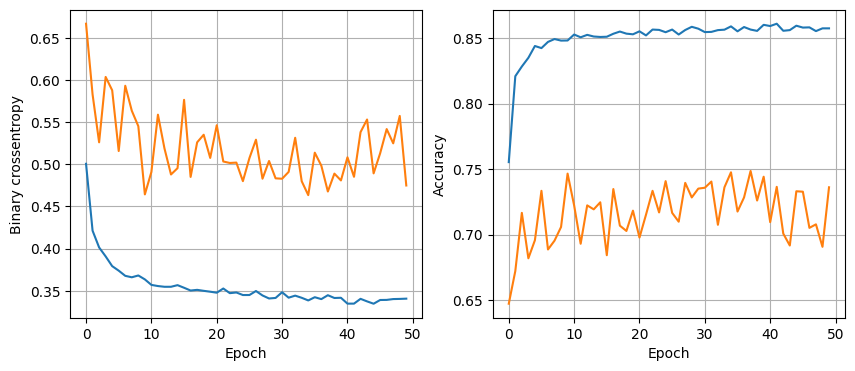

119/119 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.001, batch size 32


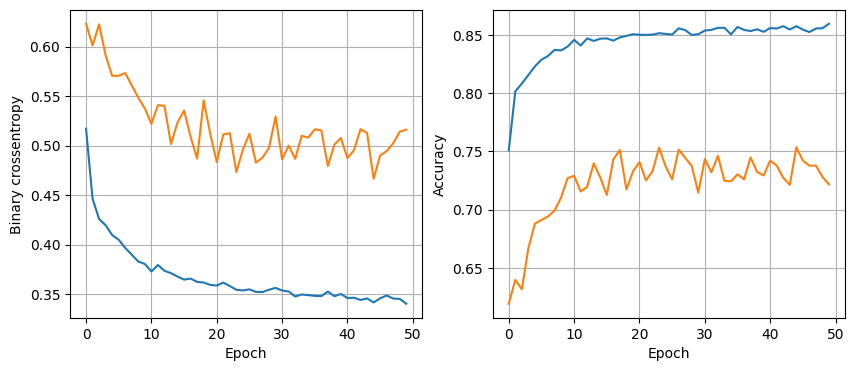

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.001, batch size 64


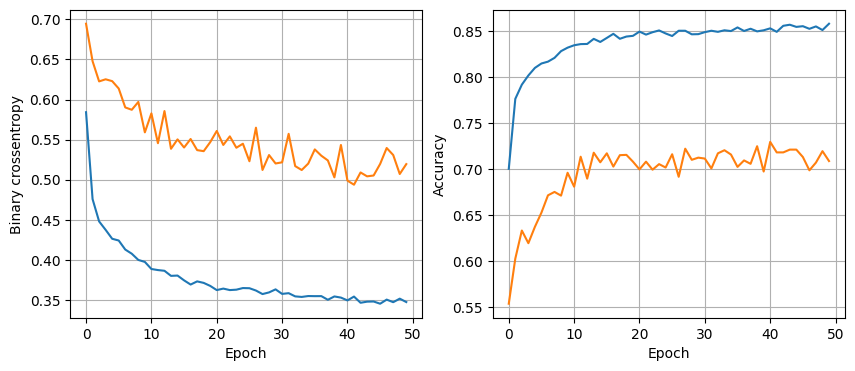

119/119 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.001, batch size 128


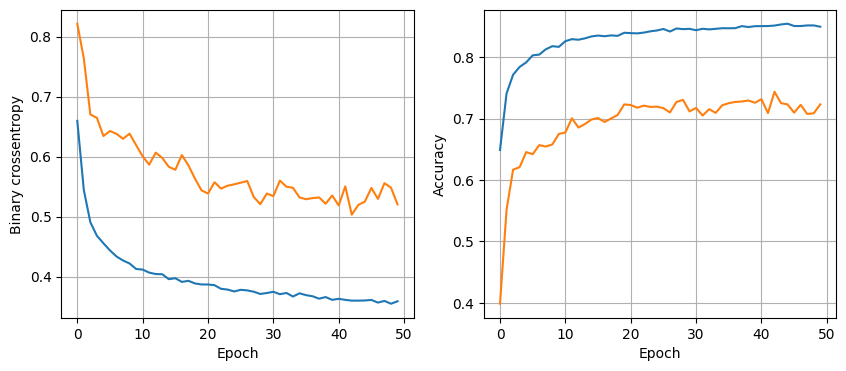

119/119 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8586
16 nodes, dropout 0.5, lr 0.01, batch size 32


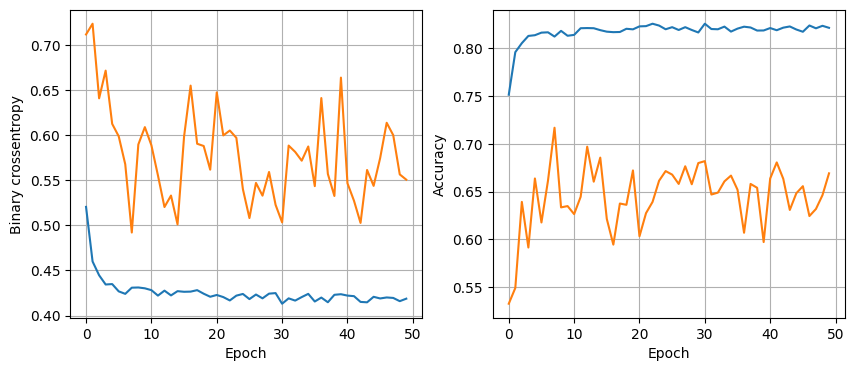

119/119 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8507
16 nodes, dropout 0.5, lr 0.01, batch size 64


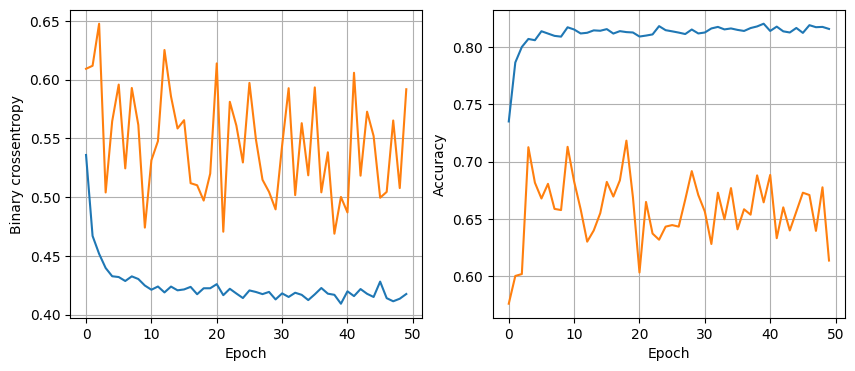

119/119 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8407
16 nodes, dropout 0.5, lr 0.01, batch size 128


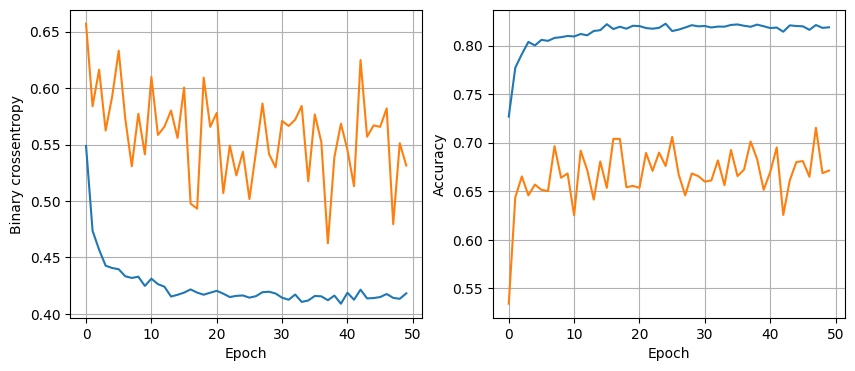

119/119 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8536
16 nodes, dropout 0.5, lr 0.005, batch size 32


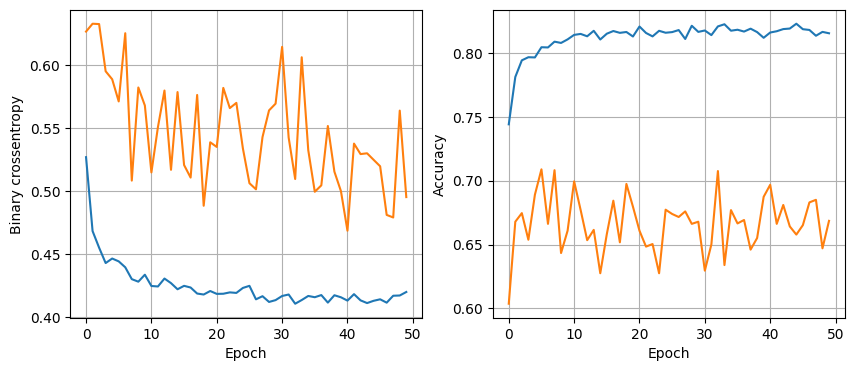

119/119 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8525
16 nodes, dropout 0.5, lr 0.005, batch size 64


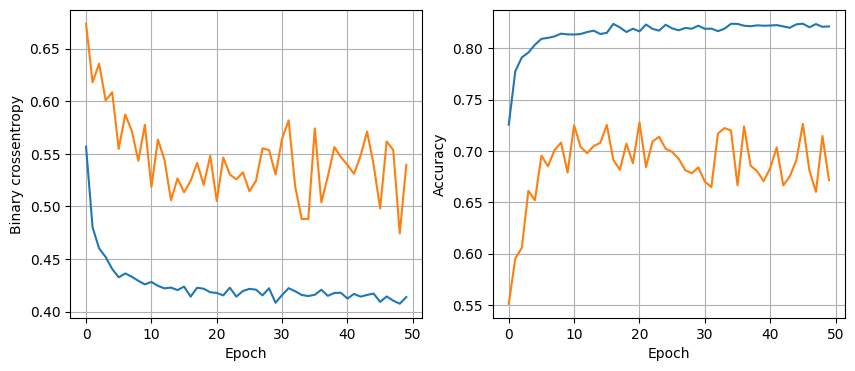

119/119 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8509
16 nodes, dropout 0.5, lr 0.005, batch size 128


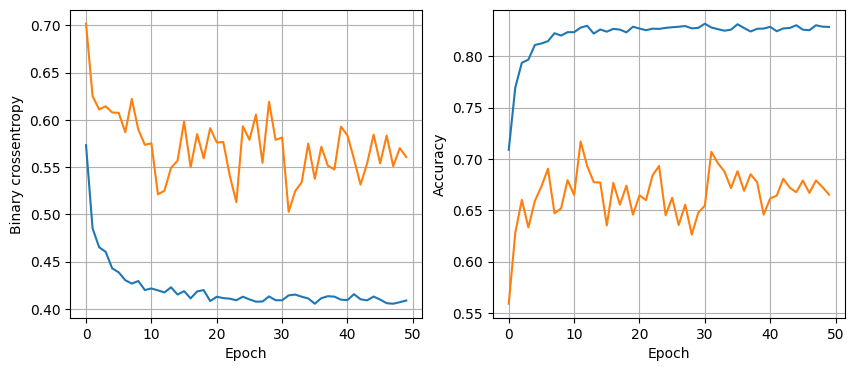

119/119 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8520
16 nodes, dropout 0.5, lr 0.001, batch size 32


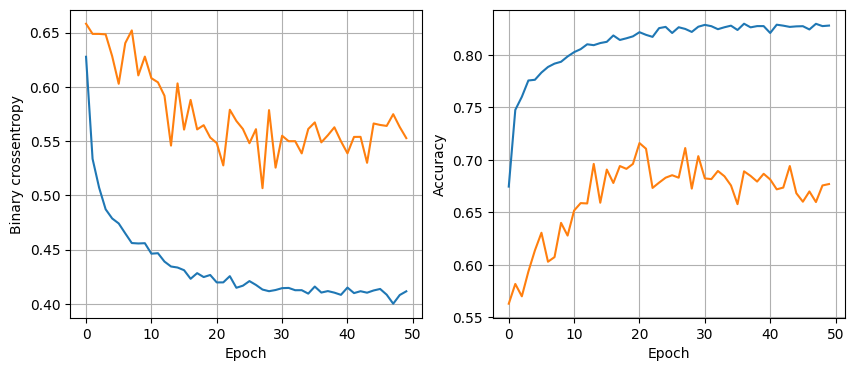

119/119 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8541
16 nodes, dropout 0.5, lr 0.001, batch size 64


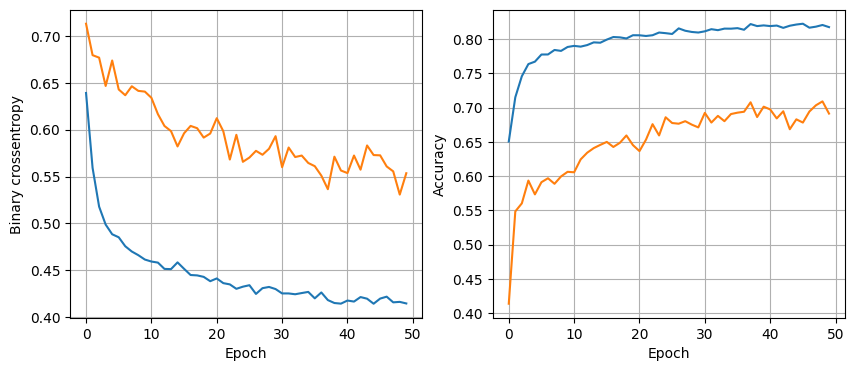

119/119 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8541
16 nodes, dropout 0.5, lr 0.001, batch size 128


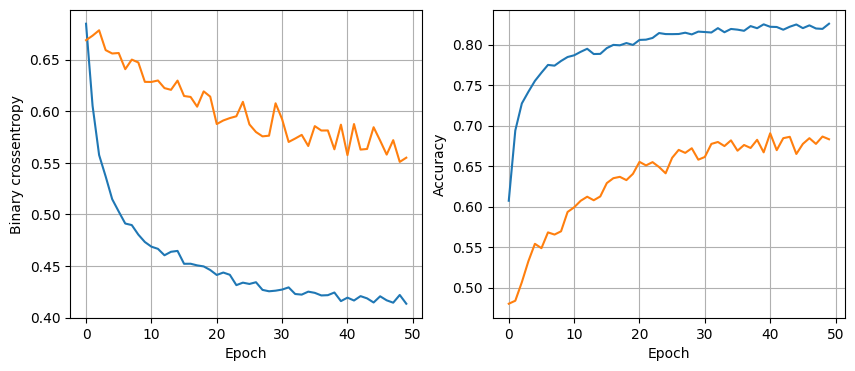

119/119 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8528
32 nodes, dropout 0, lr 0.01, batch size 32


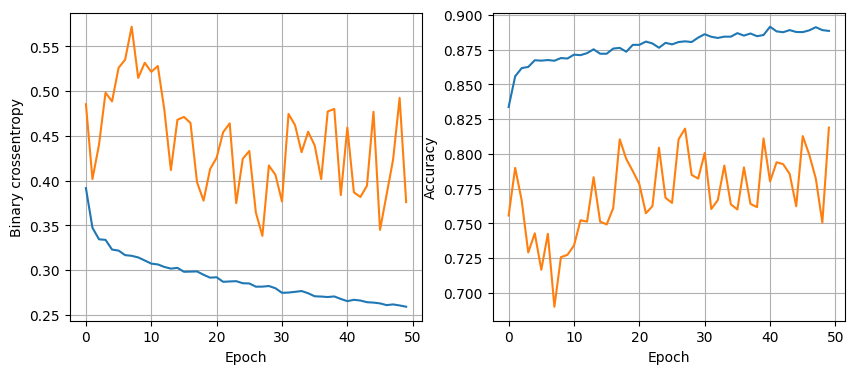

119/119 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.01, batch size 64


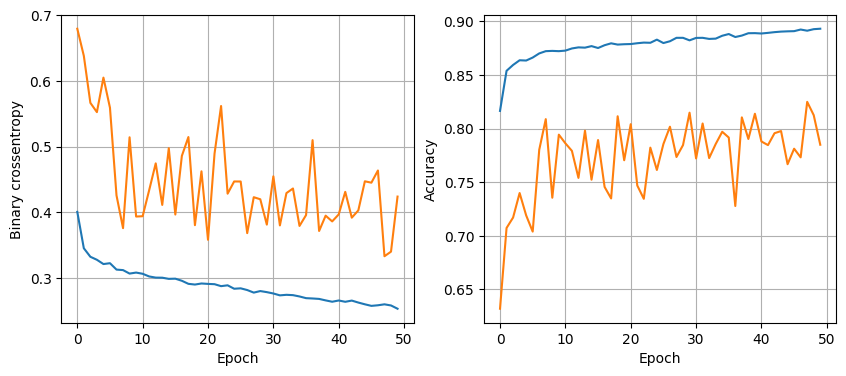

119/119 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8733
32 nodes, dropout 0, lr 0.01, batch size 128


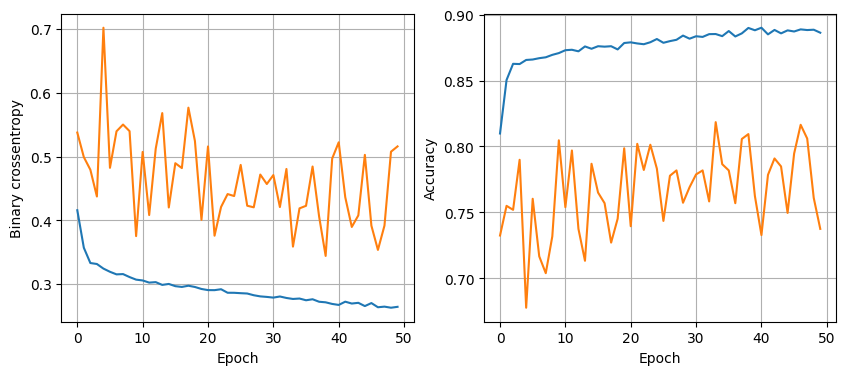

119/119 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.005, batch size 32


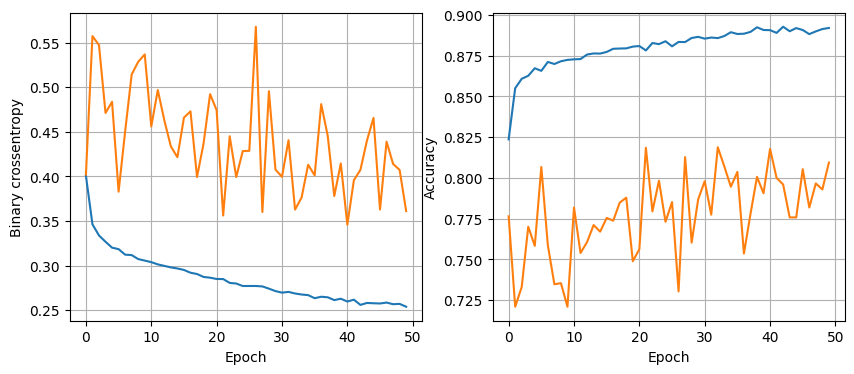

119/119 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8617
32 nodes, dropout 0, lr 0.005, batch size 64


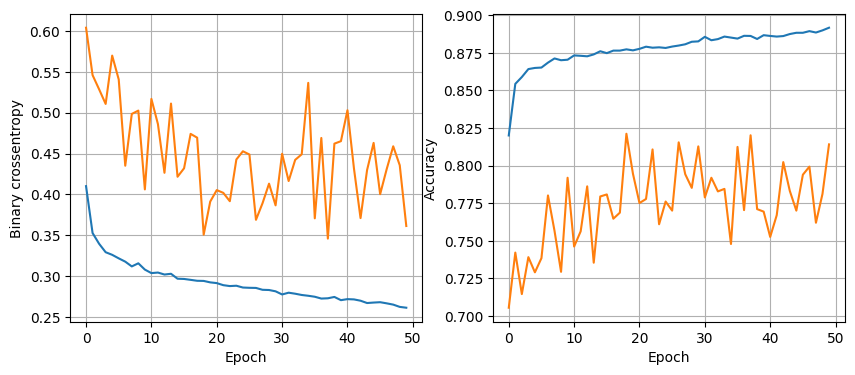

119/119 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8691
32 nodes, dropout 0, lr 0.005, batch size 128


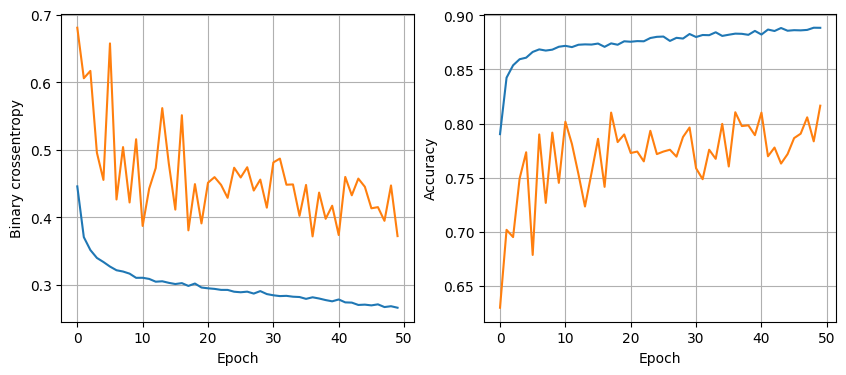

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8722
32 nodes, dropout 0, lr 0.001, batch size 32


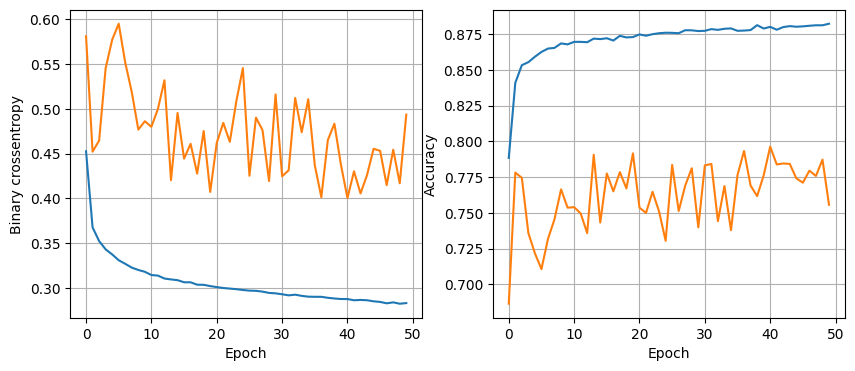

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.001, batch size 64


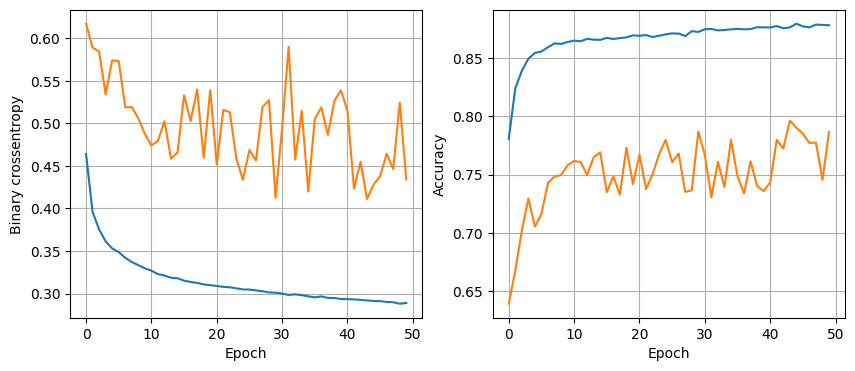

119/119 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.8722
32 nodes, dropout 0, lr 0.001, batch size 128


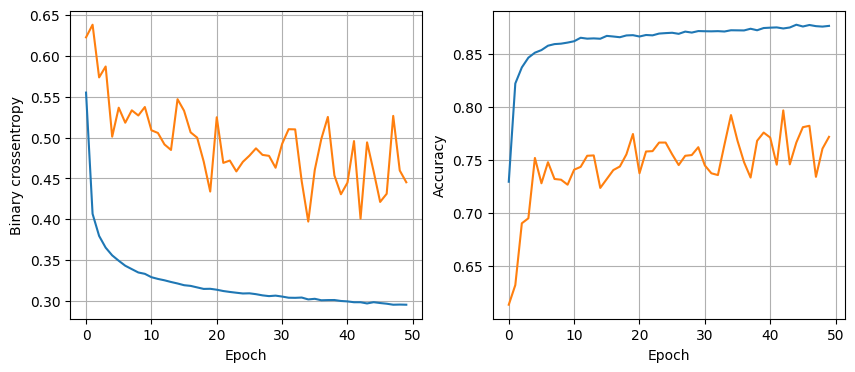

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.01, batch size 32


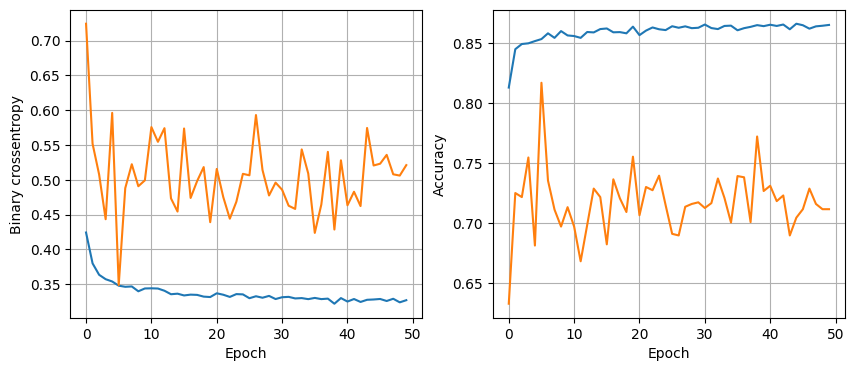

119/119 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8607
32 nodes, dropout 0.2, lr 0.01, batch size 64


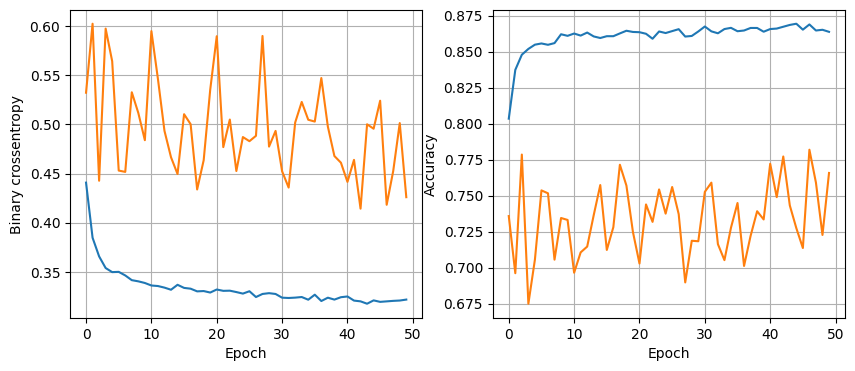

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.01, batch size 128


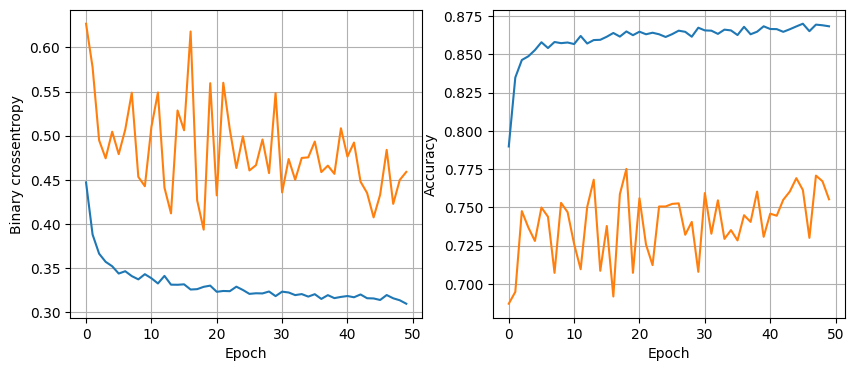

119/119 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.005, batch size 32


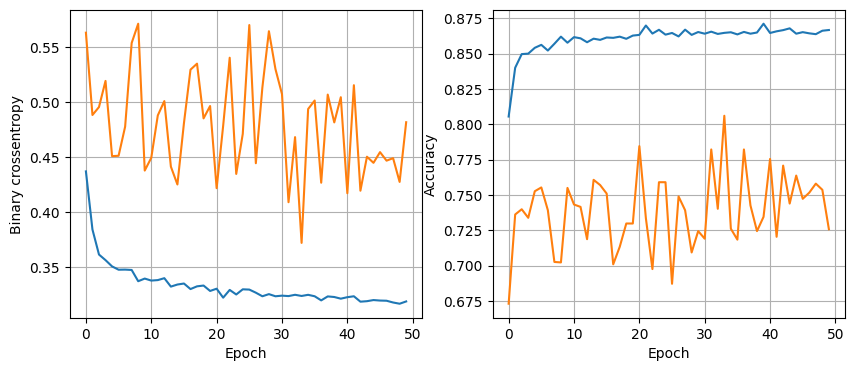

119/119 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.005, batch size 64


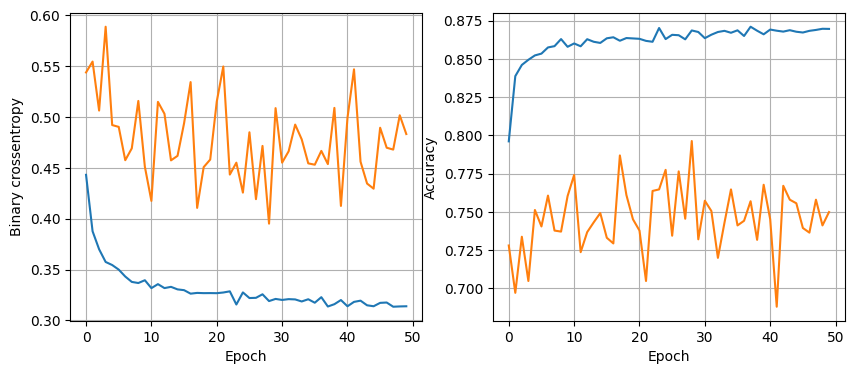

119/119 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.005, batch size 128


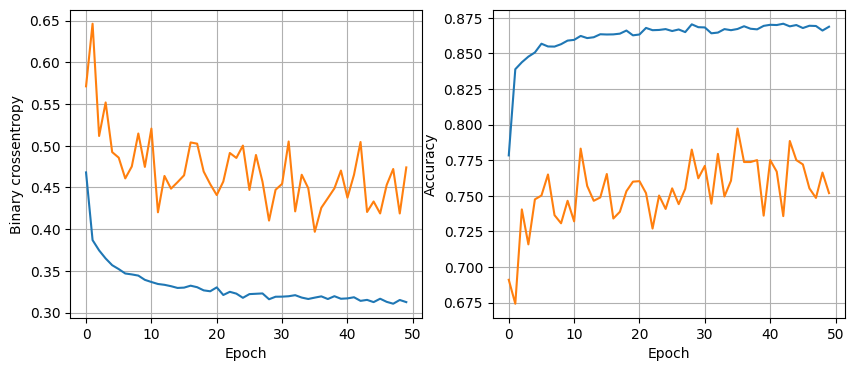

119/119 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.001, batch size 32


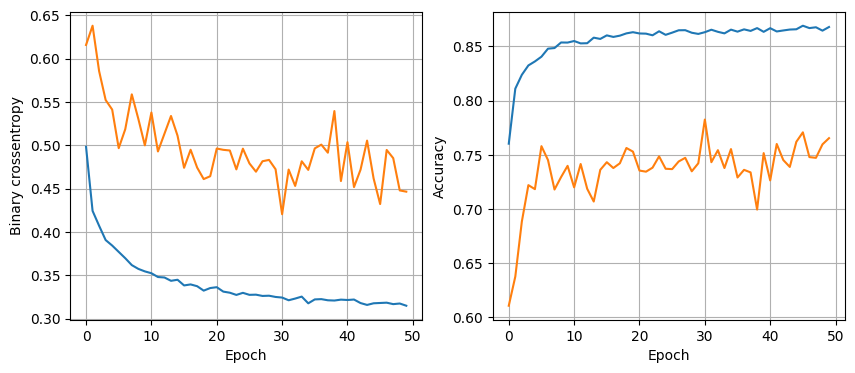

119/119 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.001, batch size 64


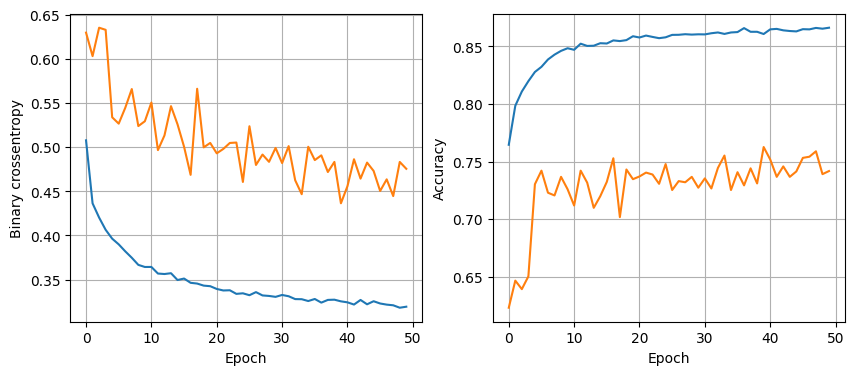

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.001, batch size 128


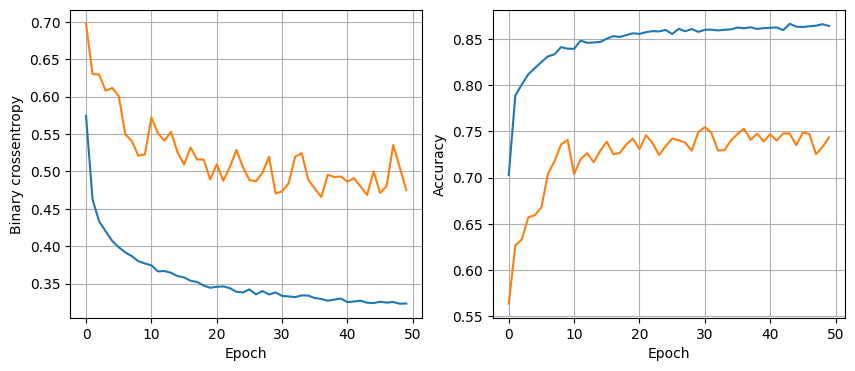

119/119 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8686
32 nodes, dropout 0.5, lr 0.01, batch size 32


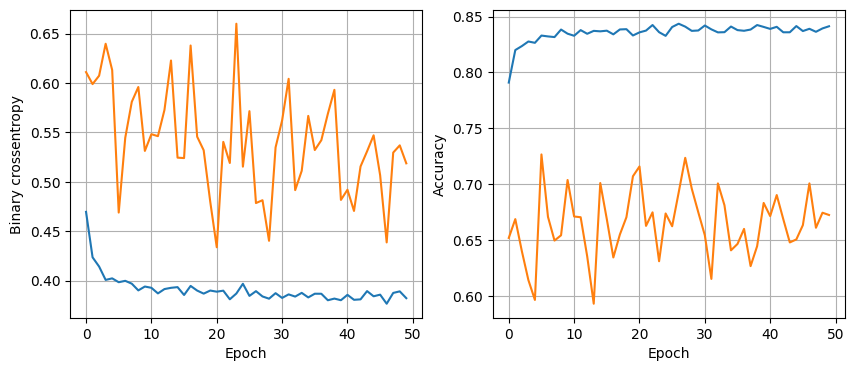

119/119 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8575
32 nodes, dropout 0.5, lr 0.01, batch size 64


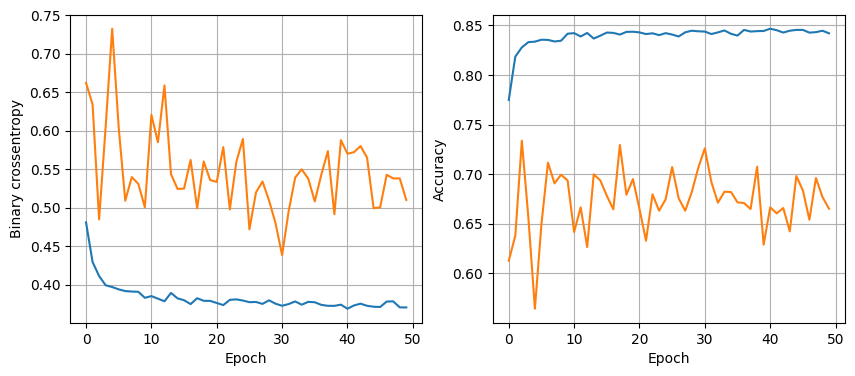

119/119 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8533
32 nodes, dropout 0.5, lr 0.01, batch size 128


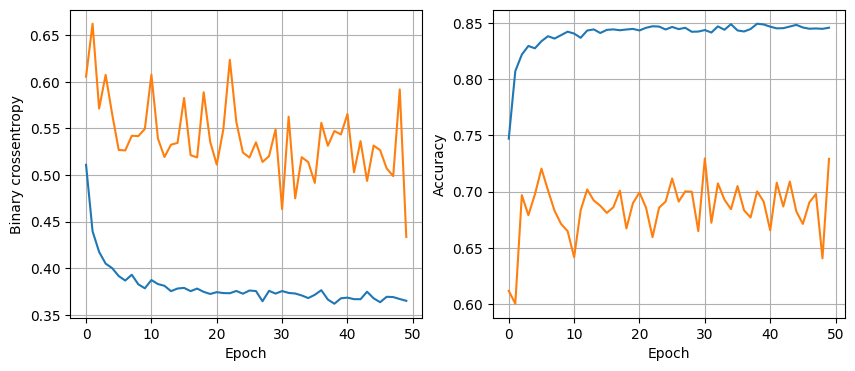

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8630
32 nodes, dropout 0.5, lr 0.005, batch size 32


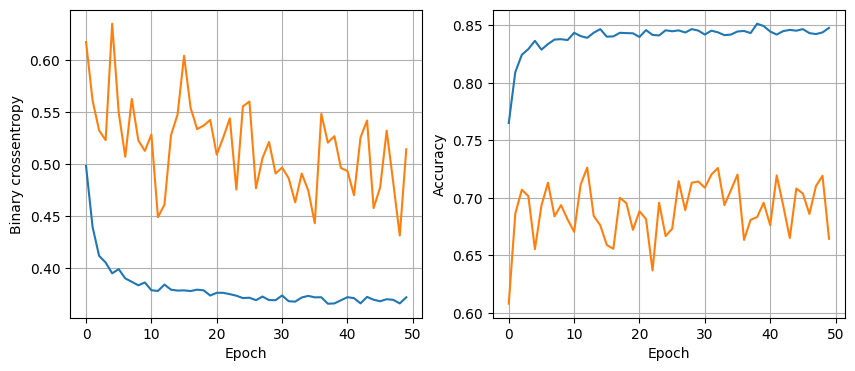

119/119 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8538
32 nodes, dropout 0.5, lr 0.005, batch size 64


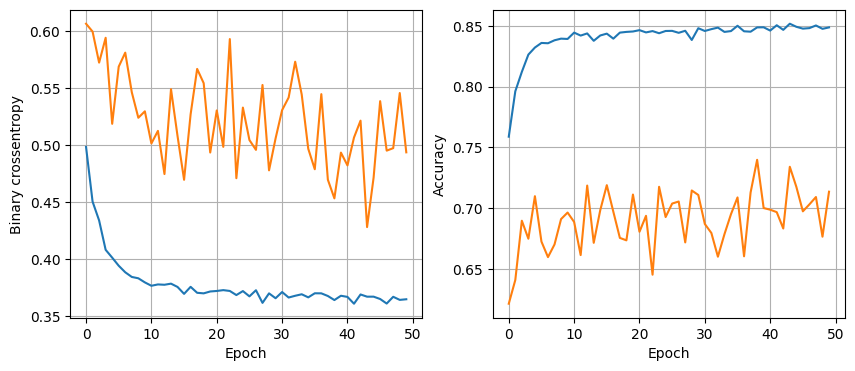

119/119 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8630
32 nodes, dropout 0.5, lr 0.005, batch size 128


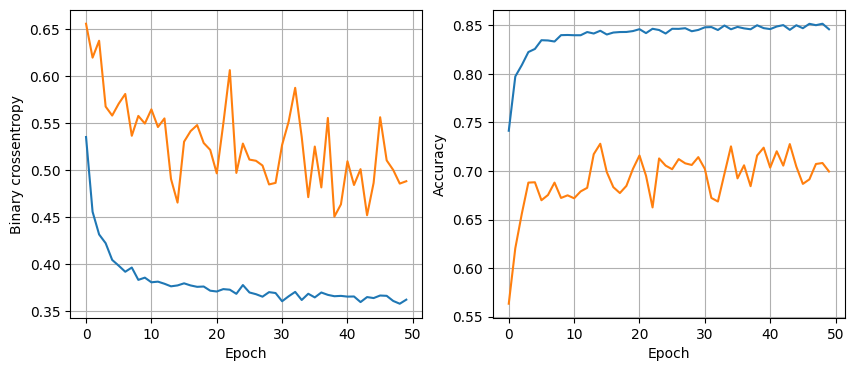

119/119 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8615
32 nodes, dropout 0.5, lr 0.001, batch size 32


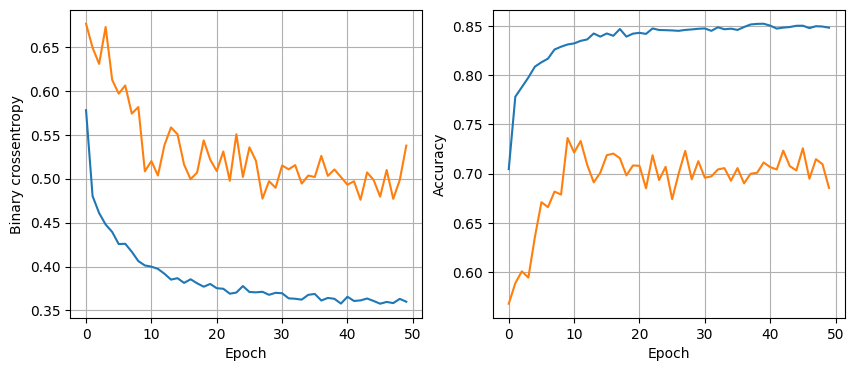

119/119 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.8609
32 nodes, dropout 0.5, lr 0.001, batch size 64


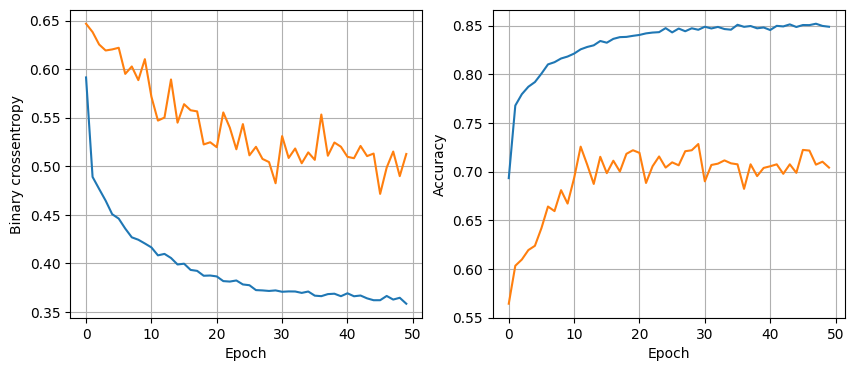

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8628
32 nodes, dropout 0.5, lr 0.001, batch size 128


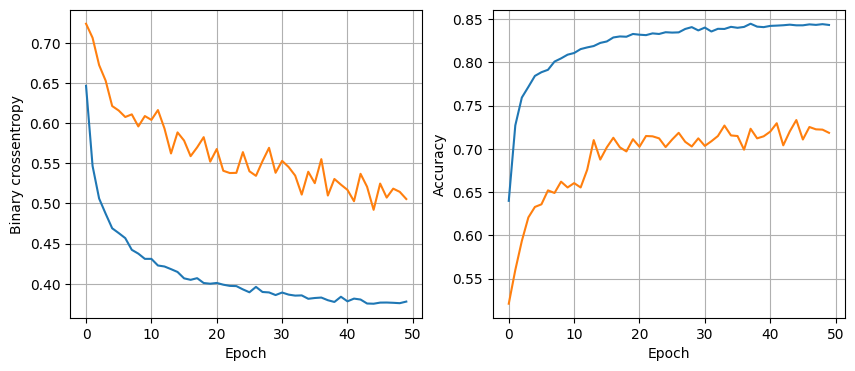

119/119 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8588
64 nodes, dropout 0, lr 0.01, batch size 32


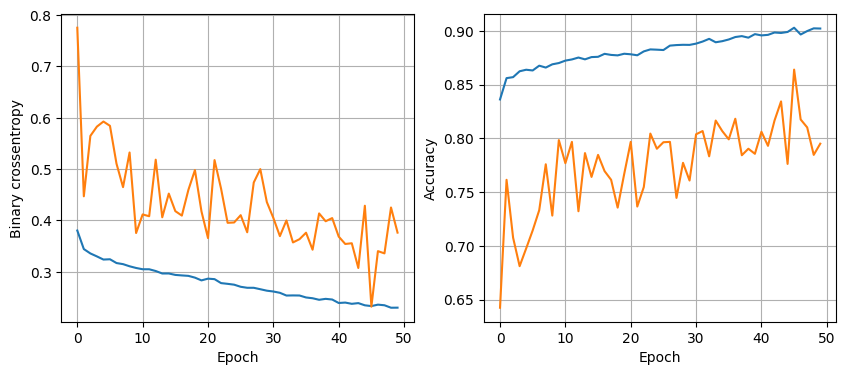

119/119 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8609
64 nodes, dropout 0, lr 0.01, batch size 64


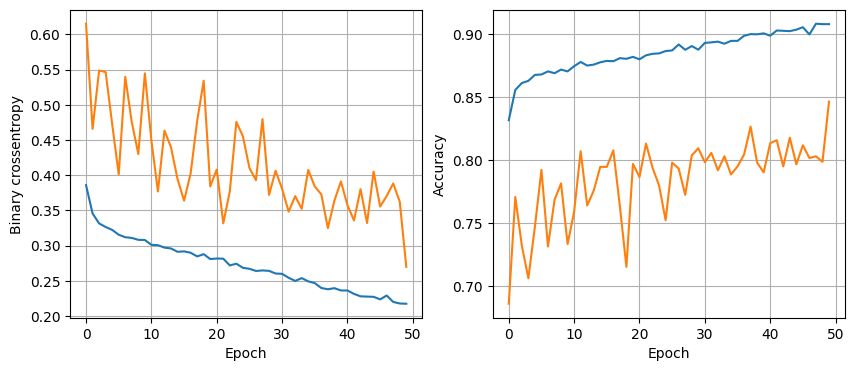

119/119 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8586
64 nodes, dropout 0, lr 0.01, batch size 128


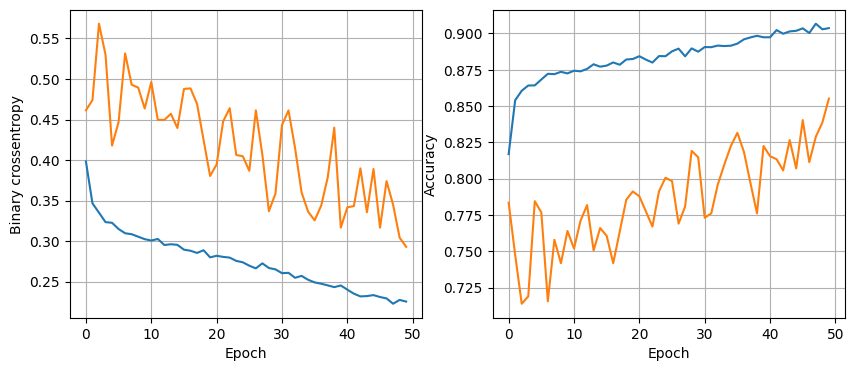

119/119 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8686
64 nodes, dropout 0, lr 0.005, batch size 32


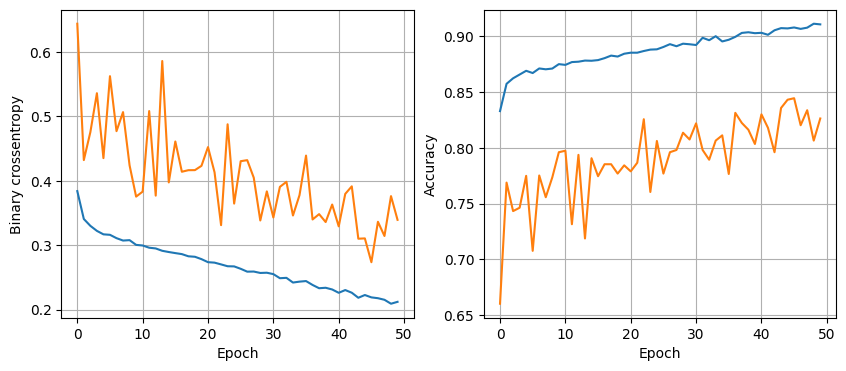

119/119 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8641
64 nodes, dropout 0, lr 0.005, batch size 64


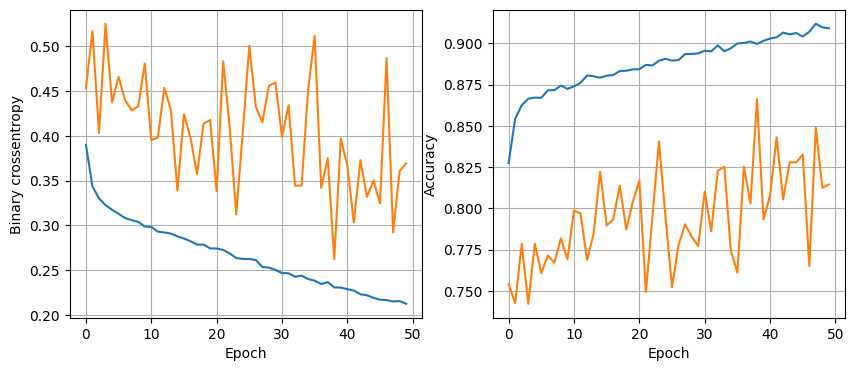

119/119 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.8675
64 nodes, dropout 0, lr 0.005, batch size 128


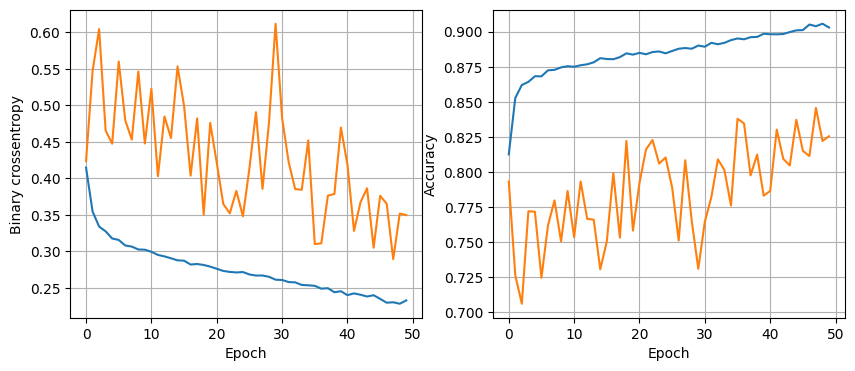

119/119 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8683
64 nodes, dropout 0, lr 0.001, batch size 32


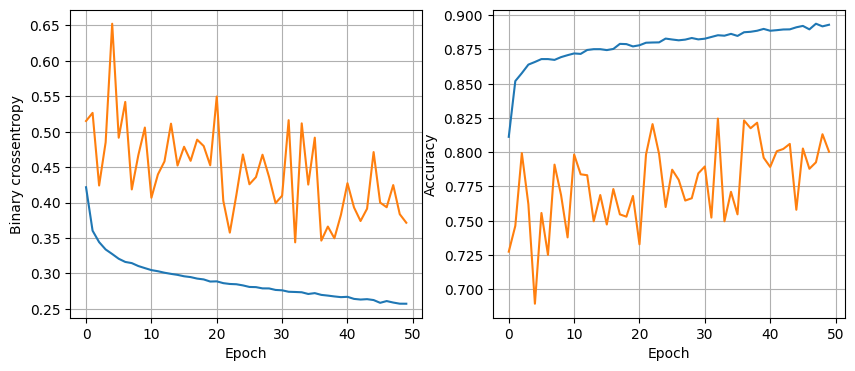

119/119 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8688
64 nodes, dropout 0, lr 0.001, batch size 64


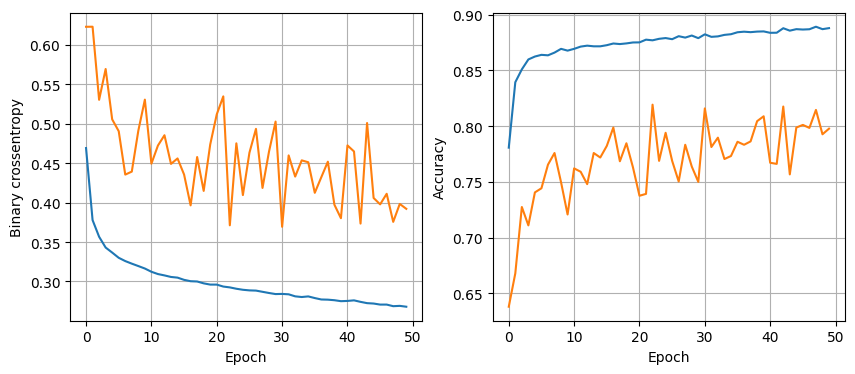

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8686
64 nodes, dropout 0, lr 0.001, batch size 128


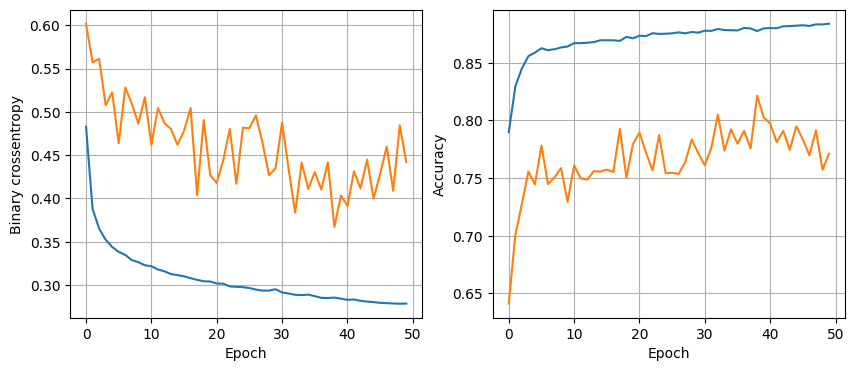

119/119 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8704
64 nodes, dropout 0.2, lr 0.01, batch size 32


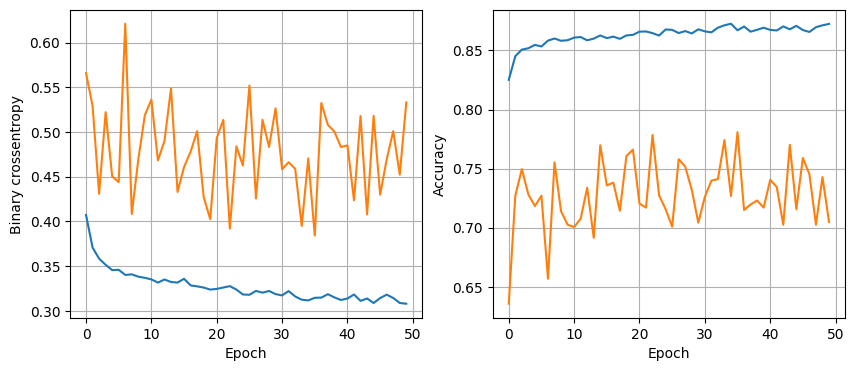

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8644
64 nodes, dropout 0.2, lr 0.01, batch size 64


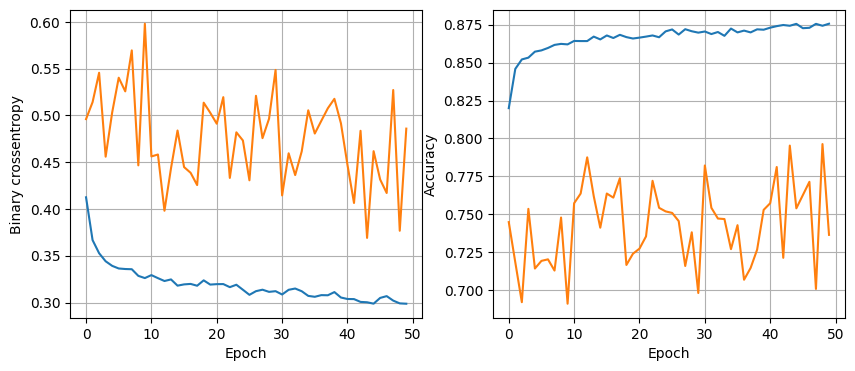

119/119 [==============================] - 0s 3ms/step - loss: 0.3129 - accuracy: 0.8667
64 nodes, dropout 0.2, lr 0.01, batch size 128


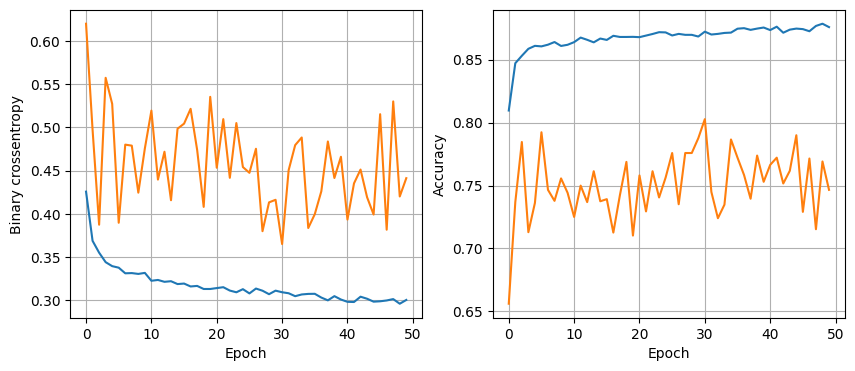

119/119 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.8657
64 nodes, dropout 0.2, lr 0.005, batch size 32


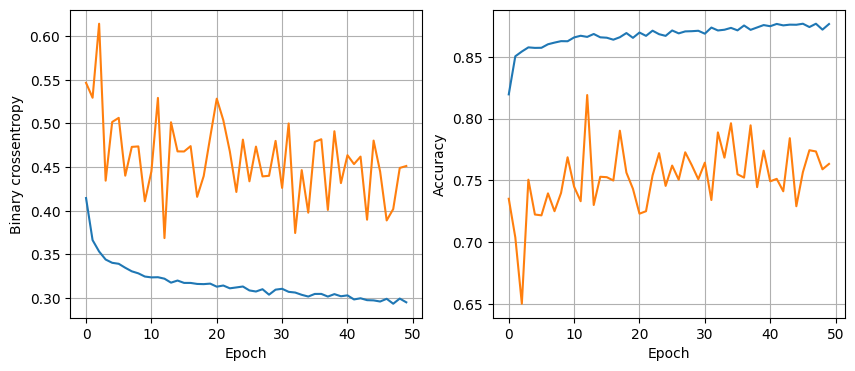

119/119 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8712
64 nodes, dropout 0.2, lr 0.005, batch size 64


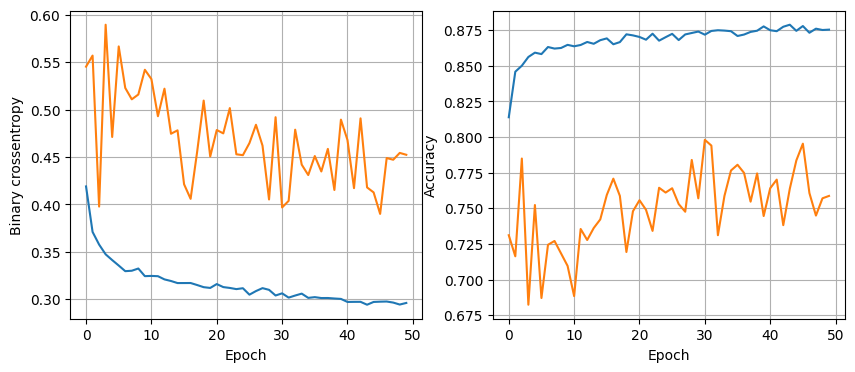

119/119 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.005, batch size 128


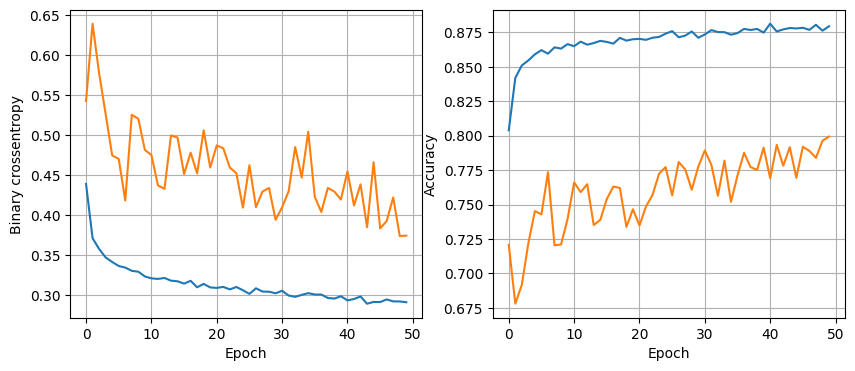

119/119 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8749
64 nodes, dropout 0.2, lr 0.001, batch size 32


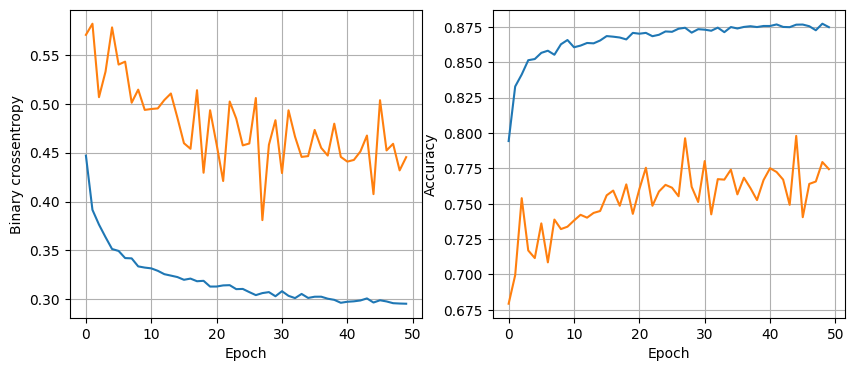

119/119 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.8757
64 nodes, dropout 0.2, lr 0.001, batch size 64


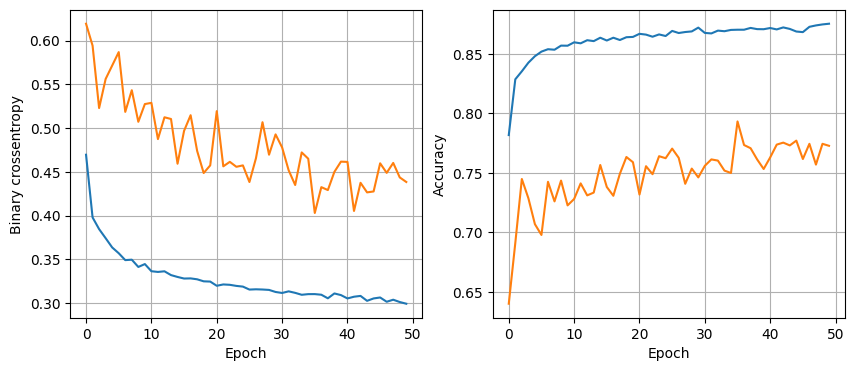

119/119 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.001, batch size 128


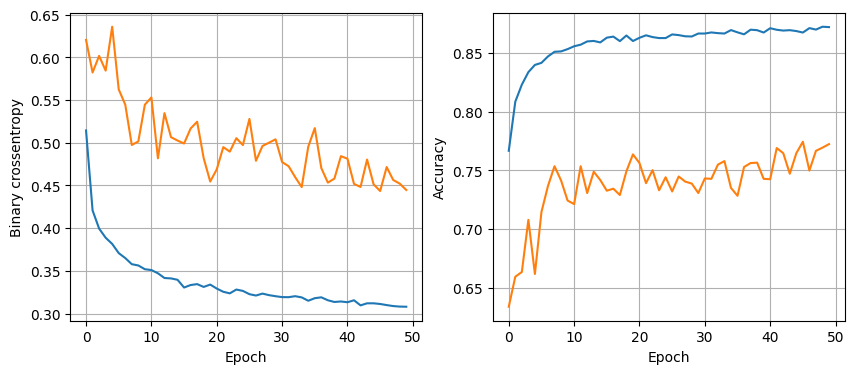

119/119 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8738
64 nodes, dropout 0.5, lr 0.01, batch size 32


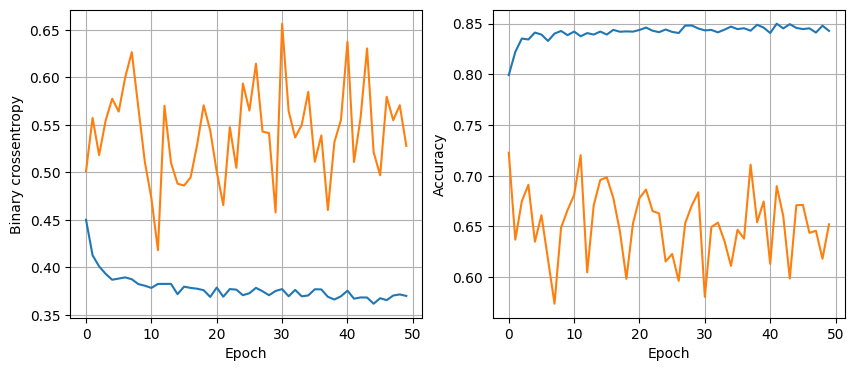

119/119 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8454
64 nodes, dropout 0.5, lr 0.01, batch size 64


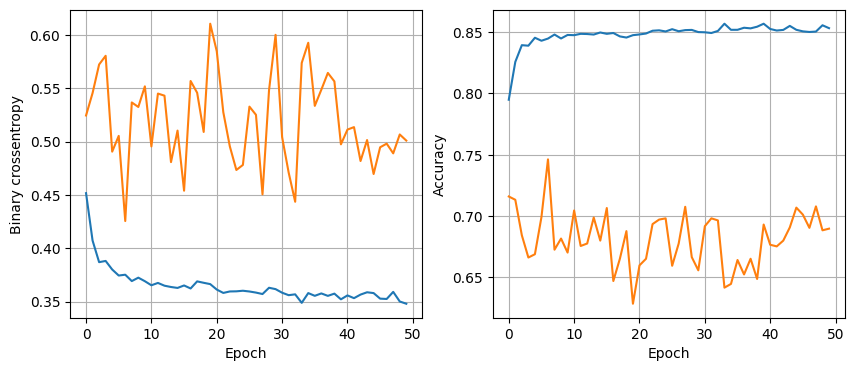

119/119 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8565
64 nodes, dropout 0.5, lr 0.01, batch size 128


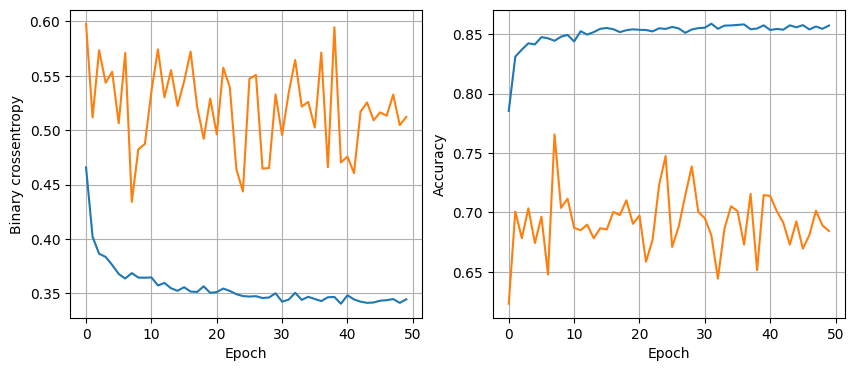

119/119 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8644
64 nodes, dropout 0.5, lr 0.005, batch size 32


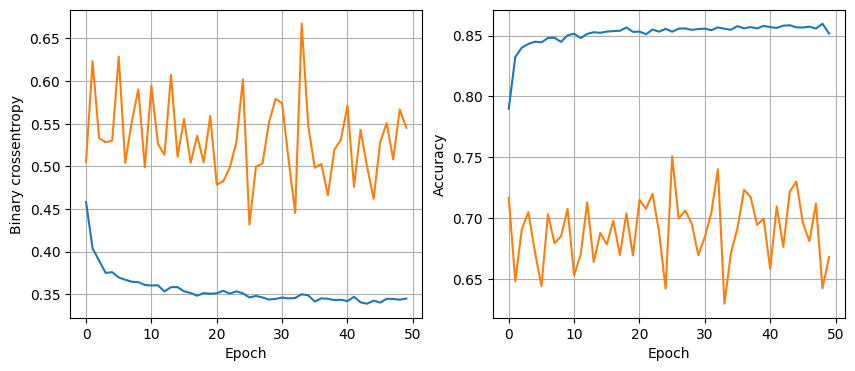

119/119 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.8559
64 nodes, dropout 0.5, lr 0.005, batch size 64


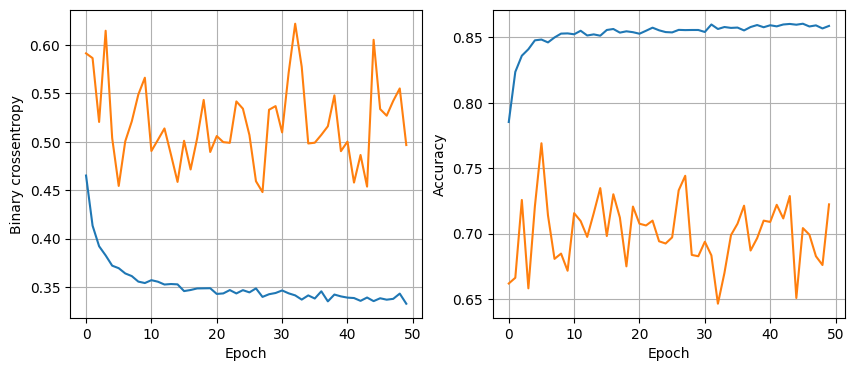

119/119 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8646
64 nodes, dropout 0.5, lr 0.005, batch size 128


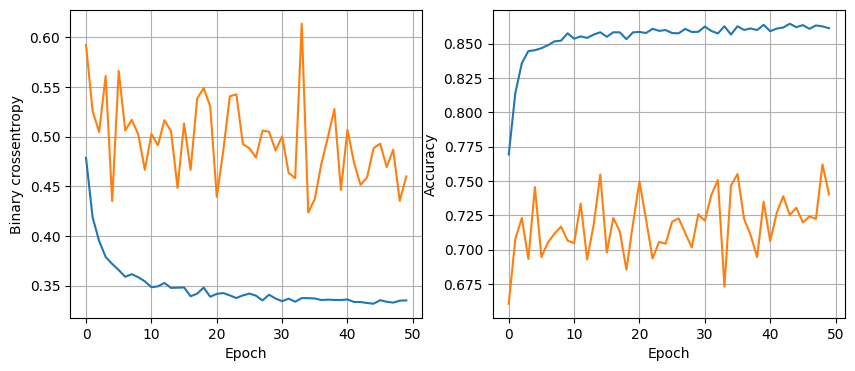

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8688
64 nodes, dropout 0.5, lr 0.001, batch size 32


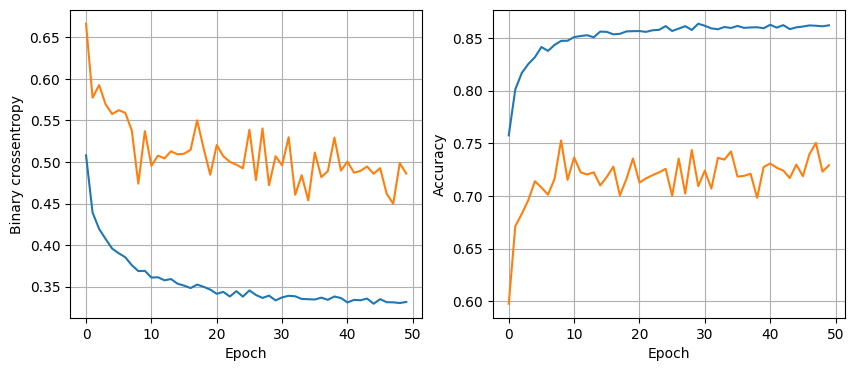

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8696
64 nodes, dropout 0.5, lr 0.001, batch size 64


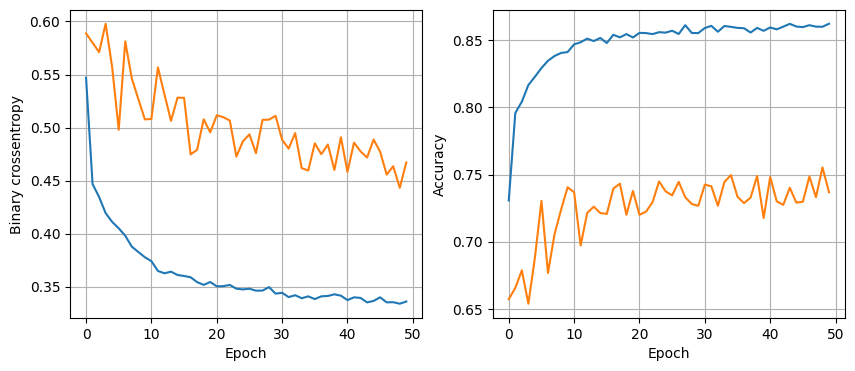

119/119 [==============================] - 0s 3ms/step - loss: 0.3108 - accuracy: 0.8704
64 nodes, dropout 0.5, lr 0.001, batch size 128


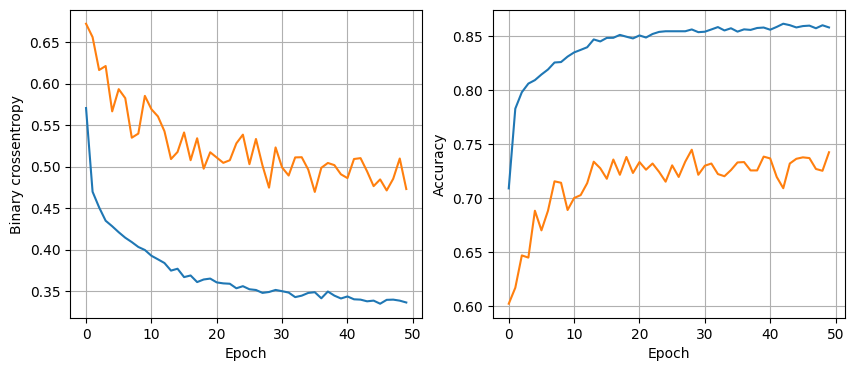

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8678


In [18]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 50
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2, 0.5]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [19]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1325
           1       0.88      0.94      0.91      2479

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

